# Proyek Analisis Data: Bike Sharing
- **Nama:** Annisa Permata Bunda
- **Email:** annisapermatabunda09@gmail.com
- **ID Dicoding:** annisapeb_9

##Pertanyaan Bisnis
1. Bagaimana hari kerja mempengaruhi pengguna bike sharing?
2. Bagaimana cuaca mempengaruhi pengguna bike sharing?
3. Bagaimana Temperatur Suhu mempengaruhi pengguna bike sharing?

##Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

##Data Wrangling
###Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Setelah melakukan Gathering Data, maka semua data terlah berhasil kita load semua data yang dibutuhkan dan telah terlihat semua kolom dan baris yang ada di setiap dataset beserta sampel isi lengkapnya untuk dipelajari langkah selanjutnya yang akan dilakukan

### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Pada dataset day_df dan hour_df terdapat beberapa variabel yang dapat dianalisis untuk menjawab pertanyaan bisnis diantaranya : season, holiday, weathersit, temp

###Cleaning Data

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
day_df.drop_duplicates(inplace=True)
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
hour_df.drop_duplicates(inplace=True)
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Pada cleaning Data ini, tidak ditemukan adanya data yang kosong pada kedua dataset
- Dari describe() yang dilakukan pada kedua dataset dapat diketahui kalau jumlah data pada dataset day_df yaitu 731 baris dan jumlah data pada dataset hour_df yaitu 17379 baris, sehingga saat melakukan penghapusan duplikat dengan perintah drop_duplicates(inplace=True) tidak ada data duplikat yang ditemukan sehingga jumlah baris data tetap sama dengan sebelum dilakukan drop_duplicates

##Exploratory Data Analysis (EDA)

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
335,336,2011-12-02,4,0,12,0,5,1,1,0.314167,0.331433,0.625833,0.100754,268,3672,3940
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408,120,1592,1712
714,715,2012-12-15,4,1,12,0,6,0,1,0.324167,0.338383,0.650417,0.106350,767,4280,5047
664,665,2012-10-26,4,1,10,0,5,1,2,0.545833,0.522750,0.807083,0.132467,1182,6262,7444
222,223,2011-08-11,3,0,8,0,4,1,1,0.717500,0.651521,0.423750,0.164796,812,3980,4792


In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15635,15636,2012-10-18,4,1,10,16,0,4,1,1,0.60,0.6212,0.56,0.2836,94,356,450
8600,8601,2011-12-30,1,0,12,3,0,5,1,1,0.24,0.2576,0.70,0.1045,0,6,6
13740,13741,2012-07-31,3,1,7,17,0,2,1,1,0.78,0.7121,0.52,0.2239,94,726,820
14514,14515,2012-09-01,3,1,9,23,0,6,0,1,0.66,0.5909,0.89,0.0896,57,88,145
16430,16431,2012-11-22,4,1,11,8,1,4,0,1,0.24,0.2424,0.75,0.1343,20,77,97


In [ ]:
day_df.loc[day_df["season"] == 1, "season"] = "Semi"
day_df.loc[day_df["season"] == 2, "season"] = "Panas"
day_df.loc[day_df["season"] == 3, "season"] = "Gugur"
day_df.loc[day_df["season"] == 4, "season"] = "Salju"

day_df.season.value_counts().sort_index()

<ipython-input-91-51fcec79bcf5>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Semi' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["season"] == 1, "season"] = "Semi"


,count
season,
Gugur,188
Panas,184
Salju,178
Semi,181


**insight**: Dari output yang kita dapatkan kita dapat mengetahui kalau penggunaan bike sharing paling banyak terjadi pada musim Gugur sebanyak 188 kali

In [ ]:
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"

day_df.yr.value_counts().sort_index()

<ipython-input-92-b6273414a4b5>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["yr"] == 0, "yr"] = "2011"


,count
yr,
2011,365
2012,366


In [ ]:
day_df.mnth.value_counts().sort_index()

,count
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


In [ ]:
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Libur"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Tidak Libur"

day_df.holiday.value_counts().sort_index()

<ipython-input-94-741575d9e42e>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Libur' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["holiday"] == 0, "holiday"] = "Libur"


,count
holiday,
Libur,710
Tidak Libur,21


**insight**: Dari output yang dihasilkan kita dapat mengetahui bahwa penggunaan bike sharing ini banyak dipakai untuk liburan yaitu sebanyak 710 kali dalam kurun waktu 2 tahun

In [ ]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Minggu"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Senin"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Selasa"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Rabu"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Kamis"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Jumat"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sabtu"

day_df.weekday.value_counts().sort_index()

<ipython-input-95-2d780817cbce>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Minggu' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["weekday"] == 0, "weekday"] = "Minggu"


,count
weekday,
Jumat,104
Kamis,104
Minggu,105
Rabu,104
Sabtu,105
Selasa,104
Senin,105


In [ ]:
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Hari Libur"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Hari Kerja"

day_df.workingday.value_counts().sort_index()

<ipython-input-96-b30d5eda0cb4>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Hari Libur' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["workingday"] == 0, "workingday"] = "Hari Libur"


,count
workingday,
Hari Kerja,500
Hari Libur,231


insight: Dari output diatas dapat diambil informasi bahwa mayoritas penggunaan sharing bike dipakai lebih banyak pada hari kerja dibandingkan dengan hari libur

In [ ]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Cerah"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Berawan"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "bersalju"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Hujan"

day_df.weathersit.value_counts().sort_index()

<ipython-input-97-f67657649b6d>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cerah' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Cerah"


,count
weathersit,
Berawan,247
Cerah,463
bersalju,21


**insight**: Dari output yang didapat, dapat diambil informasi bahwa pengguna paling banyak menggunakan bike sharing pada kondisi cuaca yang cerah dan tidak ada pengguna yang menggunakan bike sharing saat kondisi hujan

In [ ]:
hour_df.hr.value_counts().sort_index()

,count
hr,
0,726
1,724
2,715
3,697
4,697
5,717
6,725
7,727
8,727


In [ ]:
hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Cerah"
hour_df.loc[hour_df["weathersit"] == 2, "weathersit"] = "Berawan"
hour_df.loc[hour_df["weathersit"] == 3, "weathersit"] = "bersalju"
hour_df.loc[hour_df["weathersit"] == 4, "weathersit"] = "Hujan"

hour_df.weathersit.value_counts().sort_index()

<ipython-input-99-1cdb2ccc645b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cerah' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Cerah"


,count
weathersit,
Berawan,4544
Cerah,11413
Hujan,3
bersalju,1419


insight: Dari output yang dihasilkan, dapat kita ketahui kalau jam yang paling banyak untuk penggunaan bike sharing yaitu pada saat cuaca cerah

In [ ]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Semi,2011,1,Libur,Sabtu,Hari Libur,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,1,Libur,Minggu,Hari Libur,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,1,Libur,Senin,Hari Kerja,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,1,Libur,Selasa,Hari Kerja,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,1,Libur,Rabu,Hari Kerja,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Semi,2012,12,Libur,Kamis,Hari Kerja,Berawan,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Semi,2012,12,Libur,Jumat,Hari Kerja,Berawan,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Semi,2012,12,Libur,Sabtu,Hari Libur,Berawan,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Semi,2012,12,Libur,Minggu,Hari Libur,Cerah,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,Cerah,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,Cerah,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,Cerah,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,Cerah,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,Cerah,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,Berawan,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,Berawan,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,Cerah,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,Cerah,0.26,0.2727,0.56,0.1343,13,48,61


## Visualization & Explanatory Analysis

###1. Bagaimana hari kerja mempengaruhi pengguna bike sharing?

In [ ]:
PengaruhHariKerja = day_df.groupby(by="workingday").nunique().reset_index()
PengaruhHariKerja.rename(columns={"instant": "sum"}, inplace=True)
PengaruhHariKerja

,workingday,sum,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Hari Kerja,500,500,4,2,12,1,5,3,391,478,437,460,420,476,487
1,Hari Libur,231,231,4,2,12,2,7,3,200,226,218,223,223,223,223


<ipython-input-106-c328c867c789>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="sum", data=PengaruhHariKerja, palette="coolwarm")


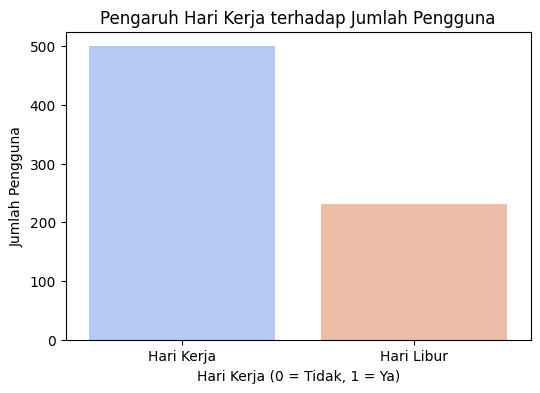

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x="workingday", y="sum", data=PengaruhHariKerja, palette="coolwarm")

plt.xlabel("Hari Kerja (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah Pengguna")
plt.title("Pengaruh Hari Kerja terhadap Jumlah Pengguna")

plt.show()

###2. Bagaimana cuaca mempengaruhi pengguna bike sharing?


In [ ]:
PengaruhCuaca = day_df.groupby(by="weathersit").nunique().reset_index()
PengaruhCuaca.rename(columns={"instant": "sum"}, inplace=True)
PengaruhCuaca

,weathersit,sum,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,Berawan,247,247,4,2,12,2,7,2,211,242,228,235,231,239,243
1,Cerah,463,463,4,2,12,2,7,2,357,444,390,429,407,449,451
2,bersalju,21,21,4,2,9,1,6,2,21,21,21,21,21,21,21


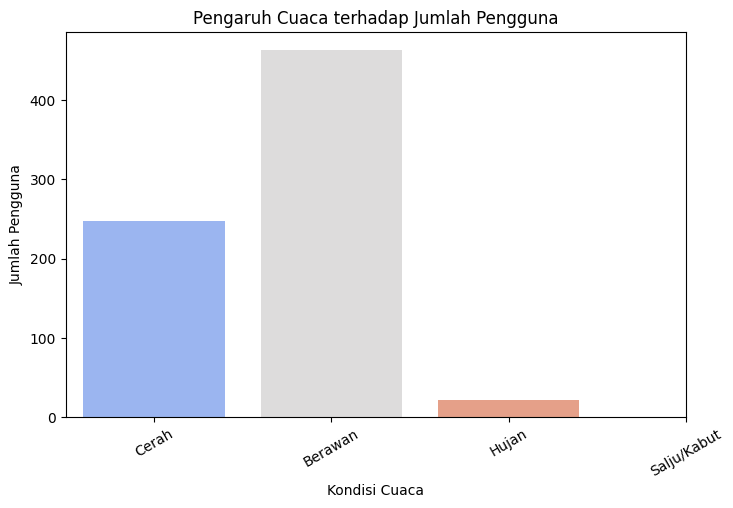

In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(x="weathersit", y="sum", hue="weathersit", data=PengaruhCuaca, palette="coolwarm", legend=False)

plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Pengguna")
plt.title("Pengaruh Cuaca terhadap Jumlah Pengguna")

plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan", "Salju/Kabut"], rotation=30)

plt.show()

###3. Bagaimana Temperatur suhu mempengaruhi pengguna bike sharing?

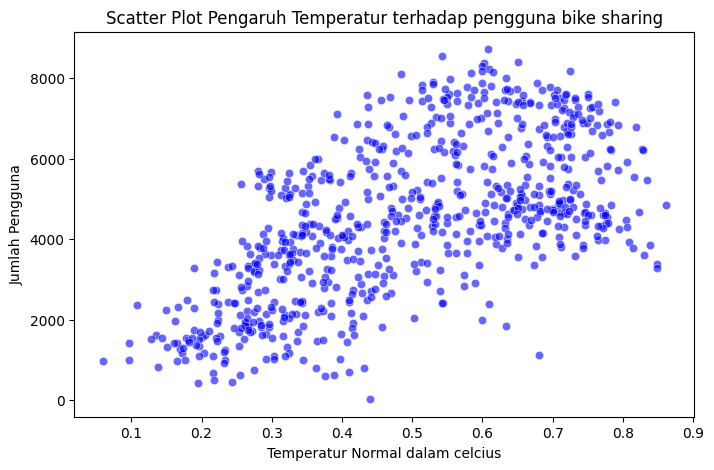

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=day_df["temp"], y=day_df["cnt"], alpha=0.6, color="blue")

plt.xlabel("Temperatur Normal dalam celcius")
plt.ylabel("Jumlah Pengguna")
plt.title("Scatter Plot Pengaruh Temperatur terhadap pengguna bike sharing")
plt.show()

## Conclusion
**Informasi yang didapatkan dari Analisis yang dilakukan:**
1. Berdasarkan analisis data yang telah dilakukan jumlah penggunaan Bike Sharing banyak digunakan pada hari kerja, sehingga dapat diketahui bahwa bike sharing banyak digunakan sebagai transportasi untuk berangkat kerja, dibandingkan dengan penggunaan untuk berjalan jalan di hari libur.
2. Berdasarkan analisis data yang telah dilakukan jumlah penggunaan Bike Sharing paling banyak digunakan pada saat kondisi cuaca yang cerah, karena dibandingkan dengan cuaca yang lainnya, kondisi cuaca yang cerah merupakan cuaca yang pas untuk bersepeda.
3. Berdasarkan analisis data yang telah dilakukan jumlah penggunaan Bike Sharing lebih banyak digunakan pada saat temperatur yang panas, cuaca yang lebih hangat meningkatkan penggunaan sepeda berdasarkan visualisasi pada grafik yang dianalisa, Hal ini dikarenakan kondisi temperatur yang sejuk cenderung hangat sangat cocok untuk bersepeda